In [240]:
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd


app = dash.Dash(__name__ ,suppress_callback_exceptions=True)

# Shivam

In [241]:
import pickle
with open('Shivam/genre_count_year_movies.pkl', 'rb') as file:
    genre_count_year_movies = pickle.load(file)

with open('Shivam/movies_dict.pkl', 'rb') as file:
    movies_dict = pickle.load(file)

with open('Shivam/genre_year_scatter_figures_dict.pkl', 'rb') as file:
    genre_year_scatter_figures_dict = pickle.load(file)

with open('Shivam/movies.pkl', 'rb') as file:
    movies = pickle.load(file)

with open('Shivam/fig_movies.pkl', 'rb') as file:
    fig_movies = pickle.load(file)

with open('Shivam/tv_series_revenue_df.pkl', 'rb') as file:
    tv_series_revenue_df = pickle.load(file)

with open('Shivam/similarity_content.pkl', 'rb') as file:
    similarity_content = pickle.load(file)
    
with open('Shivam/tv_series_dict.pkl', 'rb') as file:
    tv_series_dict = pickle.load(file)

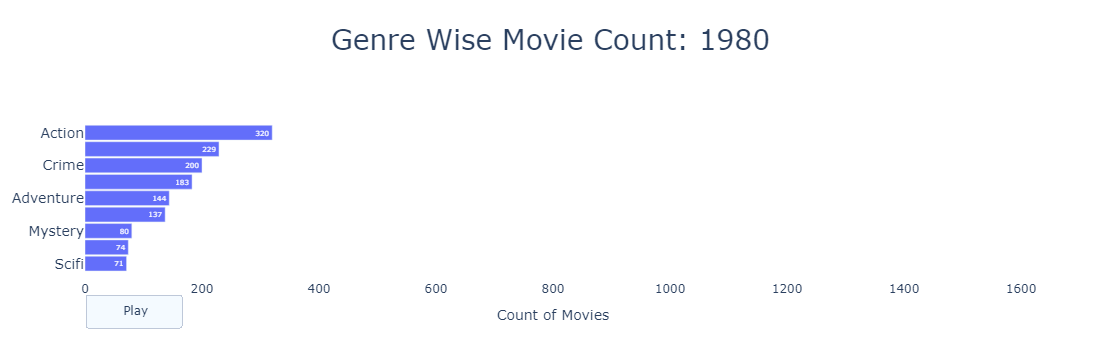

In [242]:
def getGenreOverYearsScatter(release_year):
    counts_per_year = release_year.value_counts().sort_index().to_frame()
    counts_per_year.reset_index(inplace=True)
    # Filter out movies released before 1980
    counts_per_year = counts_per_year[counts_per_year['Release Year'] >= 1980]
    fig = go.Figure(data = go.Scatter(x = counts_per_year['Release Year'], y = counts_per_year['count']))
    # Update layout
    fig.update_layout(title={'text': f'TV Shows Count Per Year','font': {'color': 'white'}},
    plot_bgcolor='rgba(0,0,0,0)', 
    paper_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(title='Year', titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),  # Set x-axis title, title color, grid color, and tick label color
    yaxis=dict(title='TV Shows Count', titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),  # Set y-axis title, title color, grid color, and tick label color
    
    )
    
    return fig
# Dictionary to store figures for each genre
genre_year_scatter_figures_dict = {}

# Iterate through each genre DataFrame in the tv_series_dict dictionary
for genre, df in tv_series_dict.items():
    # Run the function for the current genre DataFrame and store the resulting figure
    genre_year_scatter_figures_dict[genre] = getGenreOverYearsScatter(df['Release Year'])

# Dictionary to store figures for each genre for movies
genre_year_scatter_figures_dict_movies = {}

# Iterate through each genre DataFrame in the movies_dict dictionary
for genre, df in movies_dict.items():
    # Run the function for the current genre DataFrame and store the resulting figure
    genre_year_scatter_figures_dict_movies[genre] = getGenreOverYearsScatter(df['Release Year'])


@app.callback(
    Output('genre-charts_SS', 'figure'),
    [Input('genre-dropdown_SS', 'value')]
)
def update_genre_charts(selected_genres):
    # Create empty figure with subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=('TV Shows Count Per Year', 'Movies Count Per Year'))

    # Iterate through selected genres
    for genre in selected_genres:
        # Add traces for TV shows
        trace_tv = genre_year_scatter_figures_dict[genre]['data'][0]  # Assuming only one trace per figure
        trace_tv['name'] = genre
        # Increase the width of markers
        trace_tv['marker']['size'] = 15
        fig.add_trace(trace_tv, row=1, col=1)

        # Add traces for movies
        trace_movies = genre_year_scatter_figures_dict_movies[genre]['data'][0]  # Assuming only one trace per figure
        trace_movies['name'] = genre
        # Increase the width of markers
        trace_movies['marker']['size'] = 15
        fig.add_trace(trace_movies, row=1, col=2)

    # Update layout
    fig.update_layout(height=600, width=1000, showlegend=False,plot_bgcolor='rgba(0,0,0,0)', 
    paper_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(gridcolor='grey', tickfont=dict(color='white')),  # Set x-axis title, title color, grid color, and tick label color
    yaxis=dict(titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),  # Set y-axis title, title color, grid color, and tick label color
    )

    return fig

def getGenreOverYearsBar(dictionary):
    # Define the range of years
    years = list(range(1980, 2022))
    count_year_wise_dict = {str(year): {} for year in years}
    color_list = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink']
    # Iterate over the years and populate the dictionary
    for year in years:
        for genre in dictionary.keys():
            count_year_wise_dict[str(year)][genre] = {}
    genre_count_year = {}
    for year in years:
        genre_count = {}
        for genre,df in dictionary.items():
            genre_count[genre] =  len(df[df['Release Year']==year])
        temp_df = pd.DataFrame.from_dict(genre_count,orient='index').reset_index()
        temp_df.columns = ['Genre','Count']

        # Assign colors to each genre
        num_colors = len(color_list)
        color_index = 0
        genre_colors = {}

        for genre in temp_df['Genre'].unique():
            genre_colors[genre] = color_list[color_index]
            color_index = (color_index + 1) % num_colors

        # Map colors to genres
        temp_df['Color'] = temp_df['Genre'].map(genre_colors)
        genre_count_year[str(year)] = temp_df
        genre_count_year[str(year)] = genre_count_year[str(year)].sort_values(by='Count')
    return genre_count_year

def getGenreOverYearsBarMovies(dictionary):
    # Define the range of years
    years = list(range(1980, 2022))
    count_year_wise_dict = {str(year): {} for year in years}
    color_list = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink']
    # Iterate over the years and populate the dictionary
    for year in years:
        for genre in dictionary.keys():
            count_year_wise_dict[str(year)][genre] = {}
    genre_count_year = {}
    for year in years:
        genre_count = {}
        for genre, df in dictionary.items():
            genre_count[genre] = len(df[df['Release Year'] == year])
        temp_df = pd.DataFrame.from_dict(genre_count, orient='index').reset_index()
        temp_df.columns = ['Genre', 'Count']

        # Assign colors to each genre
        num_colors = len(color_list)
        color_index = 0
        genre_colors = {}

        for genre in temp_df['Genre'].unique():
            genre_colors[genre] = color_list[color_index]
            color_index = (color_index + 1) % num_colors

        # Map colors to genres
        temp_df['Color'] = temp_df['Genre'].map(genre_colors)
        genre_count_year[str(year)] = temp_df
        genre_count_year[str(year)] = genre_count_year[str(year)].sort_values(by='Count')
    return genre_count_year

def update_violin_chart(selected_genre):
    # Filter data for TV shows
    tv_data = tv_series_dict[selected_genre]
    tv_data = tv_data[tv_data['Certificate'].isin(["R", "PG-13", "TV-MA", "TV-14", "PG"])]

    # Filter data for movies
    movie_data = movies_dict[selected_genre]  # Assuming you have a dictionary 'movie_dict' with movie data
    movie_data = movie_data[movie_data['Certificate'].isin(["R", "PG-13", "TV-MA", "TV-14", "PG"])]

    # Create subplots
    fig = make_subplots(rows=2, cols=1, subplot_titles=("TV Shows", "Movies"))

    # Add violin chart for TV shows
    fig.add_trace(
        go.Violin(y=tv_data['Rating'], x=tv_data['Certificate'], box_visible=True, line_color='black',
                  meanline_visible=True, fillcolor='pink', opacity=0.6, name='Rating Distribution - TV Shows'),
        row=1, col=1
    )

    # Add violin chart for movies
    fig.add_trace(
        go.Violin(y=movie_data['Rating'], x=movie_data['Certificate'], box_visible=True, line_color='black',
                  meanline_visible=True, fillcolor='lightblue', opacity=0.6, name='Rating Distribution - Movies'),
        row=2, col=1
    )

    # Update layout
    fig.update_layout(title=f"Rating Distribution for {selected_genre}",
                      height=800,
                      plot_bgcolor='rgba(0,0,0,0)', 
                      paper_bgcolor='rgba(0,0,0,0)',
                      xaxis=dict(title='Certificate', titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),  # Set x-axis title, title color, grid color, and tick label color
                      yaxis=dict(title='Rating', titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),  # Set y-axis title, title color, grid color, and tick label color
                      legend={'font': {'color': 'white'}}  # Change legend text color to white
                      )

    return fig

@app.callback(
    Output('violin-chart_SS2', 'figure'),
    [Input('genre-dropdown_SS2', 'value')]
)
def update_chart(selected_genre):
    return update_violin_chart(selected_genre)

# Define function to get genre rating line chart
def getGenreRatingLineChart(selected_genres):
    fig = go.Figure()
    for genre in selected_genres:
        data = tv_series_dict[genre]
        data = data[data['Release Year'] != 2023]
        yearly_total_rating_df = data.groupby('Release Year')['Rating'].sum().reset_index()

        # Add trace for the genre
        fig.add_trace(go.Scatter(x=yearly_total_rating_df['Release Year'], y=yearly_total_rating_df['Rating'], mode='lines', name=genre))

    # Update layout
    fig.update_layout(
        title={'text':f'Total Rating Over Years','font': {'color': 'white'}},
        plot_bgcolor='rgba(0,0,0,0)', 
        paper_bgcolor='rgba(0,0,0,0)',
        xaxis=dict(title='Year', titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),  # Set x-axis title, title color, grid color, and tick label color
    yaxis=dict(title='Total Rating', titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),  # Set y-axis title, title color, grid color, and tick label color
    
    )

    return fig

@app.callback(
    Output('rating-line-chart_SS4', 'figure'),
    [Input('genre-dropdown_SS4', 'value')]
)
def update_rating_line_chart(selected_genres):
    return getGenreRatingLineChart(selected_genres)


def getGenreRatingLineChart(selected_genres):
    fig = go.Figure()
    for genre in selected_genres:
        data = tv_series_dict[genre]
        # Remove year 2023
        yearly_median_rating_df = data.groupby('Release Year')['Rating'].median().reset_index()

        # Add trace for the genre
        fig.add_trace(go.Scatter(x=yearly_median_rating_df['Release Year'], y=yearly_median_rating_df['Rating'], mode='lines', name=genre))

         # Update layout
        fig.update_layout(
            plot_bgcolor='rgba(0,0,0,0)', 
            paper_bgcolor='rgba(0,0,0,0)'
        )


    # Update layout
    fig.update_layout(
        title={'text':'Median Rating of TV Shows Per Year','font':{'color':'white'}},
        plot_bgcolor='rgba(0,0,0,0)', 
        paper_bgcolor='rgba(0,0,0,0)',
        xaxis=dict(title='Year', titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),  # Set x-axis title, title color, grid color, and tick label color
        yaxis=dict(title='AMedian Rating', titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),  # Set y-axis title, title color, grid color, and tick label color
        legend={'font': {'color': 'white'}}  # Change legend text color to white

    )

    return fig

@app.callback(
    Output('rating-line-chart_SS5', 'figure'),
    [Input('genre-dropdown_SS5', 'value')]
)
def update_rating_line_chart(selected_genres):
    return getGenreRatingLineChart(selected_genres)

# YearWise how rating is affected-Genre Wise
def getYearGenreRatingArea(selected_genre):
    data = tv_series_dict[selected_genre]
    # Filter data based on selected certificates
    filtered_data = data[data['Certificate'].isin(["R","PG-13","TV-MA","TV-14","PG"])]


    # Group by year and certificate, calculate average rating
    certificate_ratings = filtered_data.groupby(['Release Year', 'Certificate'])['Rating'].median().unstack()

    # Delete Year which have NaN as a rating
    certificate_ratings = certificate_ratings.dropna()
    certificate_ratings = certificate_ratings.reset_index()

    # Create a color list with a visually distinct palette
    color_palette = ['firebrick', 'royalblue', 'forestgreen', 'orange', 'purple']

    # Create a Trace for each certificate
    fig = make_subplots(rows=3, cols=2, vertical_spacing=0.05)
    for i, certificate in enumerate(["R","PG-13","TV-MA","TV-14","PG"]):
        trace = go.Scatter(
            x=certificate_ratings['Release Year'],
            y=certificate_ratings[certificate],
            name=certificate,
            mode='lines+markers',  # Include both lines and data points
            line=dict(color=color_palette[i%5], width=2),  # Consistent line style
            marker=dict(size=8, symbol='circle'),  # Clearer markers
        )
        fig.append_trace(trace, row=i//2 + 1, col=i%2 + 1)
    fig.update_layout(
        title="Average Rating by Release Year (Selected Certificates)",
        height=800,
        xaxis_title=dict(text='Rating', font=dict(size=16)),
        plot_bgcolor='rgba(0,0,0,0)', 
        paper_bgcolor='rgba(0,0,0,0)',
        xaxis=dict(title='Rating', titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),  # Set x-axis title, title color, grid color, and tick label color
        yaxis=dict(title='Years', titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),  # Set y-axis title, title color, grid color, and tick label color
        legend={'font': {'color': 'white'}}  # Change legend text color to white

    )
    return fig

# Define callback to update the chart based on selected genre
@app.callback(
    Output('rating-chart_SS6', 'figure'),
    [Input('genre-dropdown_SS6', 'value')]
)
def update_chart(selected_genre):
    return getYearGenreRatingArea(selected_genre)

# Define function to get genre runtime line chart
def getGenreRuntimeLineChart(selected_genres):
    fig = go.Figure()
    for genre in selected_genres:
        data = tv_series_dict[genre]
        # Remove year 2023
        yearly_median_runtime_df = data.groupby('Release Year')['Runtime'].median().reset_index()

        # Add trace for the genre
        fig.add_trace(go.Scatter(x=yearly_median_runtime_df['Release Year'], y=yearly_median_runtime_df['Runtime'], mode='lines', name=genre))

    # Update layout
    fig.update_layout(
        title={'text':'Median Runtime of TV Shows Per Year','font':{'color':'white'}},
        plot_bgcolor='rgba(0,0,0,0)', 
        paper_bgcolor='rgba(0,0,0,0)',
        xaxis=dict(title='Year', titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),  # Set x-axis title, title color, grid color, and tick label color
    yaxis=dict(title='Median Runtime', titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),  # Set y-axis title, title color, grid color, and tick label color
    legend={'font': {'color': 'white'}}  # Change legend text color to white

    )

    return fig

@app.callback(
    Output('runtime-line-chart_SS7', 'figure'),
    [Input('genre-dropdown_SS7', 'value')]
)
def update_runtime_line_chart(selected_genres):
    return getGenreRuntimeLineChart(selected_genres)

# Define function to get genre runtime year-wise bar chart
def getGenreRuntimeYearWiseBar(selected_year):
    genre_data = []
    for genre, df in tv_series_dict.items():
        year_genre_data = df[df['Release Year'] == selected_year]
        if not year_genre_data.empty:
            avg_runtime = year_genre_data['Runtime'].mean()
            genre_data.append({'Genre': genre, 'Average Runtime': avg_runtime})
    
    # Create DataFrame from genre_data
    genre_df = pd.DataFrame(genre_data)

    # Sort the DataFrame by 'Average Runtime' in ascending order
    #genre_df = genre_df.sort_values(by='Average Runtime', ascending=True)

    # Create bar chart
    fig = go.Figure()

    # Add bars to the figure
    fig.add_trace(go.Bar(
        x=genre_df['Genre'],
        y=genre_df['Average Runtime'],
        marker=dict(color=genre_df['Average Runtime'], colorbar=dict(title='Average Runtime')),  # Color bars based on 'Average Runtime' with a color scale
    ))

    # Update layout
    fig.update_layout(
        title={'text':f'Average Runtime of TV Shows for the {selected_year}s','font': {'color': 'white'}},
        xaxis=dict(title = 'Genre',titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),
        yaxis=dict(title = 'Average Runtime',titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),
        plot_bgcolor='rgba(0,0,0,0)', 
        paper_bgcolor='rgba(0,0,0,0)' 
    )
    return fig

# Define callback to update the bar chart based on the selected decade
@app.callback(
    Output('genre-runtime-bar_SS8', 'figure'),
    [Input('decade-slider_SS8', 'value')]
)
def update_genre_runtime_bar(selected_decade):
    # Adjust selected year to the mid-year of the decade
    try:
        return getGenreRuntimeYearWiseBar(selected_decade)
    except KeyError:
        # Handle the KeyError, e.g., by displaying a message or a default figure
        return go.Figure()

def getGenreYearGrossScatter(selected_genre):
    data = tv_series_revenue_df[selected_genre][['Release Year', 'Gross Revenue(million $)']]
    
    # Group by 'Release Year' and sum 'Gross Revenue(million $)' for each year
    grouped_data = data.groupby('Release Year', observed=False)['Gross Revenue(million $)'].sum().reset_index()
    
    
    # Count the number of movies released each year
    movie_counts = data['Release Year'].value_counts().reset_index()
    movie_counts.columns = ['Release Year', 'Movie Count']
    
    # Merge grouped_data with movie_counts to get the count of movies released each year
    grouped_data = pd.merge(grouped_data, movie_counts, on='Release Year')
    # Calculate average gross revenue per movie released each year
    grouped_data['Average Gross Revenue per Movie'] = grouped_data['Gross Revenue(million $)'] / grouped_data['Movie Count']
    grouped_data = grouped_data.reset_index(drop=True)
    
    # Remove outliers from the calculated average
    mean = grouped_data['Average Gross Revenue per Movie'].mean()
    std_dev = grouped_data['Average Gross Revenue per Movie'].std()
    lower_bound = mean - std_dev  # Adjust as needed
    upper_bound = mean + std_dev  # Adjust as needed
    grouped_data = grouped_data[(grouped_data['Average Gross Revenue per Movie'] >= lower_bound) & 
                                (grouped_data['Average Gross Revenue per Movie'] <= upper_bound)]
    
    grouped_data = grouped_data.reset_index(drop=True)
    return grouped_data

# Define the callback to update the scatter plot based on the selected genre
@app.callback(
    Output('scatter-plot_SS9', 'figure'),
    [Input('genre-dropdown_SS9', 'value')]
)
def update_bar_plot(selected_genre):
    grouped_data = getGenreYearGrossScatter(selected_genre)
    
    # Define color scale based on average gross revenue per movie
    colorbar_title = 'Revenue (million $)'
    
    # Create the bar plot
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=grouped_data['Release Year'],
        y=grouped_data['Average Gross Revenue per Movie'],
        marker=dict(color=grouped_data['Average Gross Revenue per Movie'], colorbar=dict(title=colorbar_title)),
    ))

    # Update layout
    fig.update_layout(
        title={'text': f'Bar Plot - Average Gross Revenue per Movie Vs Release Year for {selected_genre} Genre','font': {'color': 'white'}},
        plot_bgcolor='rgba(0,0,0,0)', 
        paper_bgcolor='rgba(0,0,0,0)',
        xaxis=dict(title='Release Year',titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),  # Set x-axis title and grid color
        yaxis=dict(title='Average Gross Revenue per Movie (million $)',titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),  # Set y-axis title and grid color
        legend={'font': {'color': 'yellow'}}
        
    )
    
    return fig

fig_movies.update_layout(plot_bgcolor='rgba(0,0,0,0)', 
        paper_bgcolor='rgba(0,0,0,0)')


### **Vipul and Vishnu Tab**

In [243]:
import pickle
with open('Vipul/figV1.pkl', 'rb') as file:
    figV1 = pickle.load(file)

with open('Vipul/time_traces.pkl', 'rb') as file:
    time_traces = pickle.load(file)

with open('Vipul/df_top_critic_pntve.pkl', 'rb') as file:
    df_top_critic_pntve = pickle.load(file)

with open('Vipul/top_actors_by_genre.pkl', 'rb') as file:
    top_actors_by_genre = pickle.load(file)

with open('Vipul/dictionary_top_5_directors_each_genre.pkl', 'rb') as file:
    dictionary_top_5_directors_each_genre = pickle.load(file)

with open('Vipul/indices_top_5_directors_each_genre.pkl', 'rb') as file:
    indices_top_5_directors_each_genre = pickle.load(file)

with open('Vipul/df_top5_productions.pkl', 'rb') as file:
    df_top5_productions = pickle.load(file)

with open('Vipul/df_content.pkl', 'rb') as file:
    df_content = pickle.load(file)



genrelist = ['Action & Adventure', 'Comedy', 'Drama', 'Science Fiction & Fantasy', 'Romance', 'Classics', 'Kids & Family', 'Mystery & Suspense', 'Western', 'Art House & International', 'Horror', 'Faith & Spirituality', 'Animation', 'Documentary', 'Special Interest', 'Musical & Performing Arts', 'Sports & Fitness', 'Television', 'Cult Movies', 'Anime & Manga', 'Gay & Lesbian', '']

@app.callback(
    Output('genre-line-chart', 'figure'),
    [Input('genre-dropdown', 'value')]
)
def update_line_chart(selected_genres):
    traces = []
    for genre in selected_genres:
        genre_df = time_traces[genre]
        trace = go.Scatter(
            x=genre_df['year'],
            y=genre_df['positive_reviews'],
            mode='lines',
            name=genre
        )
        traces.append(trace)
    layout = go.Layout(
        title='Positive Reviews Over Years',
        xaxis={'title': 'Year'},
        yaxis={'title': 'Positive Reviews'},
        hovermode='closest'
    )
    return {'data': traces, 'layout': layout}

@app.callback(
    Output('genre-graph', 'figure'),
    [
        Input('genre-dropdown3', 'value'),
        Input('top-directors-slider', 'value'),
        Input('plot-type-radio', 'value')
    ]
)
def update_genre_graph(selected_genre, num_top_directors, plot_type):
    directors = dictionary_top_5_directors_each_genre[selected_genre + 'Ratio'][:num_top_directors]
    top_directors_pve = df_top_critic_pntve.loc[indices_top_5_directors_each_genre[selected_genre + 'Ratio'][:num_top_directors], selected_genre + 'P'].tolist()
    top_directors_nve = df_top_critic_pntve.loc[indices_top_5_directors_each_genre[selected_genre + 'Ratio'][:num_top_directors], selected_genre + 'N'].tolist()
    
    if plot_type == 'bar':
        fig = go.Figure(data=[
            go.Bar(name='Positive Reviews', x=directors, y=top_directors_pve),
            go.Bar(name='Negative Reviews', x=directors, y=top_directors_nve)
        ])
        fig.update_layout(
            title=f'Reviews for Top {num_top_directors} Directors in {selected_genre}',
            barmode='group',
            xaxis_title='Directors',
            yaxis_title='Number of Reviews'
        )
    elif plot_type == 'pie':
        fig = go.Figure(data=[
            go.Pie(labels=directors, values=top_directors_pve, name='Positive Reviews'),
            go.Pie(labels=directors, values=top_directors_nve, name='Negative Reviews')
        ])
        fig.update_layout(
            title=f'Reviews Distribution for Top {num_top_directors} Directors in {selected_genre}'
        )
    
    return fig

@app.callback(
    Output('actor-bar-chart', 'figure'),
    [Input('genre-dropdown2', 'value')]
)
def update_bar_chart(selected_genre):
    # Get DataFrame of top actors for selected genre
    top_actors_df = top_actors_by_genre[selected_genre]
    
    # Create bar chart data
    data = [
        go.Bar(name='Positive Reviews', x=top_actors_df['actors'], y=top_actors_df['positive_reviews']),
        go.Bar(name='Negative Reviews', x=top_actors_df['actors'], y=top_actors_df['negative_reviews'])
    ]
    
    # Create bar chart layout
    layout = go.Layout(
        title=f'Top 5 Actors in {selected_genre}',
        barmode='group',  # Display bars side by side
        xaxis={'title': 'Actors'},
        yaxis={'title': 'Number of Reviews'}
    )
    
    # Create bar chart figure
    figure = {'data': data, 'layout': layout}
    
    return figure

@app.callback(
    Output('rating-pie-chart', 'figure'),
    [Input('company-dropdown', 'value')]
)
def update_pie_chart(selected_company):
    # Filter data for the selected production company
    selected_data = df_top5_productions[df_top5_productions['production_company'] == selected_company]
    
    # Extract ratings and corresponding values
    ratings = ['PG', 'R', 'NR', 'G', 'PG-13', 'NC17']
    values = [selected_data[rating].values[0] for rating in ratings]
    
    # Create pie chart using Plotly
    fig = go.Figure(data=[go.Pie(labels=ratings, values=values)])
    fig.update_layout(title=f'Content Ratings Distribution for {selected_company}')
    
    return fig


@app.callback(
    Output('genre-treemapV', 'figure'),
    [Input('genre-dropdownV', 'value')]
)
def update_genre_treemap(selected_genre):
    selected_row = df_content[df_content['Genre'] == selected_genre]
    
    fig = px.treemap(
        selected_row.melt(id_vars='Genre', var_name='Rating', value_name='Count'),
        path=['Genre', 'Rating'],
        values='Count',
        color='Count',
        color_continuous_scale='RdBu',
        title=f'Treemap for {selected_genre}'
    )
    
    return fig



# Anshul and Ruby tab

In [244]:
with open('Anshul/A1.pkl', 'rb') as file:
    A1 = pickle.load(file)

with open('Anshul/A2.pkl', 'rb') as file:
    A2 = pickle.load(file)

with open('Anshul/A3.pkl', 'rb') as file:
    A3 = pickle.load(file)

with open('Anshul/A4.pkl', 'rb') as file:
    A4 = pickle.load(file)

with open('Anshul/A5.pkl', 'rb') as file:
    A5 = pickle.load(file)

with open('Anshul/A6.pkl', 'rb') as file:
    A6 = pickle.load(file)

with open('Anshul/A7.pkl', 'rb') as file:
    A7 = pickle.load(file)

with open('Anshul/A8.pkl', 'rb') as file:
    A8 = pickle.load(file)

with open('Anshul/A9.pkl', 'rb') as file:
    A9 = pickle.load(file)


#load pickle dataset for dash plot
    
#callback

# Web APP

In [245]:


app.layout = html.Div([
    dcc.Tabs(
        id='tabs',
        value='tab-1',
        children=[
            dcc.Tab(label='Tab 1', value='tab-1'),
            dcc.Tab(label='Anshul', value='tab-2'),
            dcc.Tab(label='Tab 3', value='tab-3'),
            dcc.Tab(label='Vipul', value='tab-4'),
        ],
          # Apply custom styling directly to the Tabs component
    ),
    html.Div(id='tabs-content')
], style={'background-image': 'linear-gradient(to right, black, darkgrey)',
                  'background-size': '400% 400%',}) # Setting background color directly in layout



@app.callback(Output('tabs-content', 'children'),
              [Input('tabs', 'value')])
def render_content(tab):
    if tab == 'tab-1':
        return html.Div([
           dcc.Dropdown(
                id='genre-dropdown_SS',
                options=[
                    {'label': html.Span(f'genre', style={'color': '#26D7FF'}), 'value': genre} for genre in genre_year_scatter_figures_dict.keys()
                ],
                value=['Action'],  # Default value (multiple)
                multi=True,  # Allow multiple selections
                clearable=False, 
                style={'background-color': 'rgba(0, 0, 0, 0)', 'color': '#26D7FF'} 

            ),
            dcc.Graph(id='genre-charts_SS'),
            dcc.Graph(
                id='fig_movies_SS',
                figure=fig_movies.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)',title={'font': {'color': 'white'}}, xaxis=dict(titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),  # Set x-axis title, title color, grid color, and tick label color
    yaxis=dict(titlefont=dict(color='white'), gridcolor='grey', tickfont=dict(color='white')),  # Set y-axis title, title color, grid color, and tick label color
    )
            ),
            dcc.Dropdown(
                id='genre-dropdown_SS2',
                options=[
                    {'label': html.Span(genre, style={'color': '#26D7FF'}), 'value': genre} for genre in genre_year_scatter_figures_dict.keys()
                ],
                value='Action',  # Default value
                clearable=False,
                style = {'background-color': 'rgba(0, 0, 0, 1)', 'color': 'black'}
            ),
            dcc.Graph(id='violin-chart_SS2'),
            dcc.Dropdown(
                id='genre-dropdown_SS4',
                options=[{'label': html.Span(genre, style={'color': '#26D7FF'}), 'value': genre} for genre in tv_series_dict.keys()],
                value=['Action','Horror'],  # Default value
                multi=True,  # Allow multiple selections
                clearable=False,
                style = {'background-color': 'rgba(0, 0, 0, 0)', 'color': '#26D7FF'}
            ),
            dcc.Graph(id='rating-line-chart_SS4'),
            dcc.Dropdown(
                id='genre-dropdown_SS5',
                options=[{'label': html.Span(genre, style={'color': '#26D7FF'}), 'value': genre} for genre in tv_series_dict.keys()],
                value=['Action','Horror','Romance'],  # Default value
                multi=True,  # Allow multiple selections
                clearable=False,
                style = {'background-color': 'rgba(0, 0, 0, 0)', 'color': '#26D7FF'}
            ),
            dcc.Graph(id='rating-line-chart_SS5'),
            html.H1("TV Series Rating Distribution",style={'color': 'white'}),
            dcc.Dropdown(
                id='genre-dropdown_SS6',
                options=[{'label': html.Span(genre, style={'color': '#26D7FF'}), 'value': genre} for genre in tv_series_dict.keys()],
                value='Action',
                style={'background-color': 'rgba(0, 0, 0, 0)', 'color': '#26D7FF'}
            ),
            dcc.Graph(id='rating-chart_SS6'),
            dcc.Dropdown(
                id='genre-dropdown_SS7',
                options=[{'label': html.Span(genre, style={'color': '#26D7FF'}), 'value': genre} for genre in tv_series_dict.keys()],
                value=['Action','Horror','Romance'],  # Default value
                multi=True,  # Allow multiple selections
                clearable=False,
                style = {'background-color': 'rgba(0, 0, 0, 0)', 'color': '#26D7FF'}
            ),
            dcc.Graph(
                id='runtime-line-chart_SS7',
            ),
            dcc.Slider(
                id='decade-slider_SS8',
                min=1980,
                max=2023,
                value=2021,  # Default value
                marks={year: f'{year}s' for year in range(1980, 2021, 10)},
                step=None,
                included=False # Trigger callback only on mouseup
            ),
            dcc.Graph(id='genre-runtime-bar_SS8'),
            dcc.Dropdown(
                id='genre-dropdown_SS9',
                options=[{'label': html.Span(genre, style={'color': '#26D7FF'}), 'value': genre} for genre in tv_series_revenue_df.keys()],
                value='Action',  # Default value
                style = {'background-color': 'rgba(0, 0, 0, 0)', 'color': '#26D7FF'}
            ),
            dcc.Graph(id='scatter-plot_SS9')
            
        ],
        style={
            'background-image': 'linear-gradient(to right, black, darkgrey)',
            'background-size': '400% 400%',}
        )
    elif tab == 'tab-2':
        return html.Div([
            html.H3('Tab 2 content'),
            dcc.Graph(
                id='A1',
                figure=A1
            ),
            dcc.Graph(
                id='A2',
                figure=A2
            ),
            dcc.Graph(
                id='A3',
                figure=A3
            ),
            dcc.Graph(
                id='A4',
                figure=A4
            ),
            dcc.Graph(
                id='A5',
                figure=A5
            ),
            dcc.Graph(
                id='A6',
                figure=A6
            ),
            dcc.Graph(
                id='A7',
                figure=A7
            ),
            dcc.Graph(
                id='A8',
                figure=A8
            ),
            dcc.Graph(
                id='A9',
                figure=A9
            )
            
            
        ])
    elif tab == 'tab-3':
        return html.Div([
            html.H3('Tab 3 content'),
            dcc.Graph(
                id='tab3-graph',
                figure={
                    'data': [
                        {'labels': ['A', 'B', 'C'], 'values': [1, 2, 3], 'type': 'pie', 'name': 'Pie chart'},
                    ],
                    'layout': {
                        'title': 'Tab 3 Plot'
                    }
                }
            )
        ])
    elif tab == 'tab-4':
        return html.Div([
            html.H3('Tab 4 content'),
            #graph1
            dcc.Graph(
                id='tab4-graph',
                figure=figV1  # Assuming figV1 is defined elsewhere
            ),
            #graph2
            dcc.Dropdown(
                id='genre-dropdown',
                options=[{'label': genre, 'value': genre} for genre in time_traces.keys()],
                value=['Animation'],  # Default selected genres
                multi=True  # Allow multiple selections
            ),
            #graph3
            dcc.Graph(id='genre-line-chart'),
            dcc.Dropdown(
                id='genre-dropdown2',
                options=[{'label': genre, 'value': genre} for genre in top_actors_by_genre.keys()],
                value=list(top_actors_by_genre.keys())[0],  # Default value for dropdown (first genre)
                style={'width': '50%'}
            ),
            #graph4
            dcc.Graph(id='actor-bar-chart'),
            dcc.Dropdown(
                id='genre-dropdown3',
                options=[{'label': genre, 'value': genre} for genre in genrelist],
                value=genrelist[0],
                clearable=False,
                style={'width': '50%'}
            ),
            # Slider for selecting number of top directors
            dcc.Slider(
                id='top-directors-slider',
                min=1,
                max=5,
                step=1,
                value=5,
                marks={i: str(i) for i in range(1, 6)},
            ),
            # Radio buttons for plot type
            dcc.RadioItems(
                id='plot-type-radio',
                options=[
                    {'label': 'Bar Chart', 'value': 'bar'},
                    {'label': 'Pie Chart', 'value': 'pie'}
                ],
                value='bar',
                labelStyle={'display': 'block'}
            ),
            
            # Graph display
            dcc.Graph(id='genre-graph'),

            dcc.Dropdown(
                id='company-dropdown',
                options=[{'label': company, 'value': company} for company in df_top5_productions['production_company']],
                value=df_top5_productions['production_company'][0]  # Default value is the first production company
            ),
            dcc.Graph(id='rating-pie-chart'),

            dcc.Dropdown(
                id='genre-dropdownV',
                options=[{'label': genre, 'value': genre} for genre in genrelist],
                value=genrelist[0],
                style={'width': '50%'}
            ),
             dcc.Graph(id='genre-treemapV')
            
            
        ])




In [246]:
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=7889)

# http://127.0.0.1:8005/
